In [1]:
import pandas as pd
data_chick = pd.read_csv('ch5-1.csv')

In [2]:
data_chick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   chick_nm    30 non-null     object
 1   weight      30 non-null     int64 
 2   egg_weight  30 non-null     int64 
 3   movement    30 non-null     int64 
 4   food        30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [3]:
data_chick.head()

,chick_nm,weight,egg_weight,movement,food
0,a01,140,65,146,14
1,a02,128,62,153,12
2,a03,140,65,118,13
3,a04,135,65,157,13
4,a05,145,69,157,13


In [4]:
refined_chick = data_chick.iloc[:, 1:5]

In [5]:
refined_chick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   weight      30 non-null     int64
 1   egg_weight  30 non-null     int64
 2   movement    30 non-null     int64
 3   food        30 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB


In [6]:
refined_chick.head()

,weight,egg_weight,movement,food
0,140,65,146,14
1,128,62,153,12
2,140,65,118,13
3,135,65,157,13
4,145,69,157,13


In [7]:
chick_cor = refined_chick.corr(method = 'pearson')
chick_cor

,weight,egg_weight,movement,food
weight,1.000000,0.957169,0.380719,0.877574
egg_weight,0.957169,1.000000,0.428246,0.808147
movement,0.380719,0.428246,1.000000,0.319011
food,0.877574,0.808147,0.319011,1.000000


In [8]:
import seaborn as sns

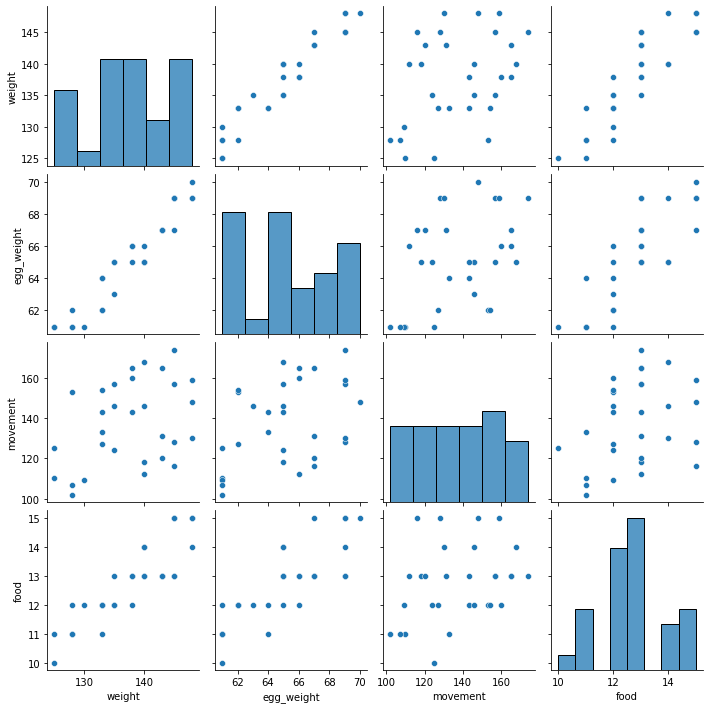

In [9]:
sns.pairplot(refined_chick)

In [10]:
import statsmodels.formula.api as smf
chick_slm = smf.ols(formula = 'weight ~ egg_weight', data = refined_chick)
chick_slm_result = chick_slm.fit()
chick_slm_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     306.0
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           1.32e-16
Time:                        19:55:50   Log-Likelihood:                -63.148
No. Observations:                  30   AIC:                             130.3
Df Residuals:                      28   BIC:                             133.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.5475      8.705     -1.671      0.106     -32.380       3.285
egg_weight     2.3371      0.134     17.493      0.000       2.063       2.611
==============================================================================
Omnibus:                       15.078   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                2.750
Skew:                           0.032   Prob(JB):                        0.253
Kurtosis:                       1.518   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='egg_weight', ylabel='weight'>

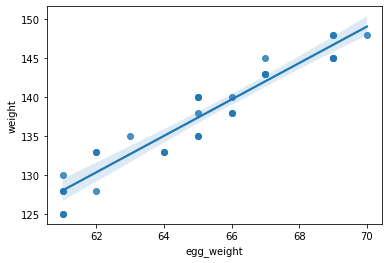

In [11]:
sns.regplot(x='egg_weight', y='weight', data=refined_chick)

In [12]:
chick_slm2 = smf.ols(formula = 'weight ~ food', data = refined_chick)
chick_slm2_result = chick_slm2.fit()
chick_slm2_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     93.81
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           1.94e-10
Time:                        19:55:50   Log-Likelihood:                -78.279
No. Observations:                  30   AIC:                             160.6
Df Residuals:                      28   BIC:                             163.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.1551      6.169     12.669      0.000      65.519      90.791
food           4.6684      0.482      9.686      0.000       3.681       5.656
==============================================================================
Omnibus:                        1.785   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.239
Skew:                           0.238   Prob(JB):                        0.538
Kurtosis:                       2.125   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='food', ylabel='weight'>

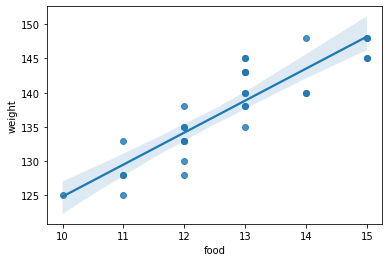

In [13]:
sns.regplot(x='food', y='weight', data=refined_chick)

In [42]:
import statsmodels.api as sm

y = refined_chick['weight']
X = refined_chick[['egg_weight', 'movement', 'food']]

variables = X.columns.tolist()
forward_variables = []
sl_enter = 0.05
sl_remove = 0.05
sv_per_step = []
adj_r_squared_list = []
steps = []
step = 0

while len(variables) > 0:
    remainder = list(set(variables) - set(forward_variables))
    pval = pd.Series(index=remainder, dtype = float)
    for col in remainder:
        X_temp = X[forward_variables + [col]]
        X_temp = sm.add_constant(X_temp)
        model = sm.OLS(y, X_temp).fit(disp=0)
        pval[col] = model.pvalues[col]
    min_pval = pval.min()
    if min_pval < sl_enter:
        forward_variables.append(pval.idxmin())
        while len(forward_variables) > 0:
            selected_X = X[forward_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y, selected_X).fit(disp=0).pvalues[1:]
            max_pval = selected_pval.max()
            if max_pval >= sl_remove:
                remove_variable = selected_pval.idxmax()
                forward_variables.remove(remove_variable)
            else:
                break
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y, sm.add_constant(X[forward_valriables])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(forward_variables.copy())
    else:
        break

print('선택된 변수:', forward_variables)

선택된 변수: ['egg_weight', 'food']


In [34]:
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

def standardize_var(x):
    mean = np.mean(x)
    std = np.sqrt(np.sum(np.square(x-mean))/(len(x)-1))
    return ((x-mean)/std)/np.sqrt(len(x)-1)
 
src = refined_chick.apply(standardize_var)
src_X = sdf[['egg_weight','food']]
corr = np.array(src_X.corr())
corr_inv = np.linalg.inv(corr)

fit = ols('weight~egg_weight+food',data=src).fit()
 
variables = []
reg_coef = []
vif = []
for i in range(len(src_X.columns)):
    col_name = src_X.columns[i]
    variables.append(col_name)
    reg_coef.append(fit.params[col_name])
    vif.append(corr_inv[i][i])
    
rc_res = pd.DataFrame()
rc_res['Variable'] = variables
rc_res['Estimate'] = reg_coef
rc_res['VIF'] = vif

rc_res

,Variable,Estimate,VIF
0,egg_weight,0.714794,2.882685
1,food,0.299915,2.882685


In [14]:
chick_mlm = smf.ols(formula = 'weight ~ egg_weight + food', data = refined_chick)
chick_mlm_result = chick_mlm.fit()
chick_mlm_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     243.0
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           5.44e-18
Time:                        19:55:51   Log-Likelihood:                -56.164
No. Observations:                  30   AIC:                             118.3
Df Residuals:                      27   BIC:                             122.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6638      8.370      0.438      0.665     -13.510      20.837
egg_weight     1.7453      0.183      9.536      0.000       1.370       2.121
food           1.5955      0.399      4.001      0.000       0.777       2.414
==============================================================================
Omnibus:                        2.302   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                1.940
Skew:                          -0.502   Prob(JB):                        0.379
Kurtosis:                       2.263   Cond. No.                     1.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
def closest_num(list, val):
    norm = 100
    nearest = 0
    for num in list:
        if abs(val - num) < norm:
            norm = abs(val - num)
            nearest = num
    return nearset

In [16]:
from tkinter import *

blank = "                                                 "

def predict_by_slm_with_egg_weight():
    egg_weight = float(entry_egg_weight.get())
    chick_weight = chick_slm_result.params.egg_weight * egg_weight + chick_slm_result.params.Intercept
    label_predict.config(text=f"Predicted Chick Weight : {chick_weight:.2f}")
    button_slm1.config(bg = '#B8DFF8')
    button_slm2.config(bg='SystemButtonFace')
    button_mlm.config(bg='SystemButtonFace')
    
def predict_by_slm_with_food():
    food = float(entry_food.get())
    chick_weight = chick_slm2_result.params.food * food + chick_slm2_result.params.Intercept
    label_predict.config(text=f"Predicted Chick Weight : {chick_weight:.2f}")
    button_slm2.config(bg = '#B8DFF8')
    button_slm1.config(bg='SystemButtonFace')
    button_mlm.config(bg='SystemButtonFace')
    
def predict_by_mlm_with_egg_weight_and_food():
    egg_weight = float(entry_egg_weight.get())
    food = float(entry_food.get())
    chick_weight = chick_mlm_result.params.egg_weight * egg_weight + chick_mlm_result.params.food * food + chick_mlm_result.params.Intercept
    label_predict.config(text=f"Predicted Chick Weight : {chick_weight:.2f}")
    button_mlm.config(bg = '#B8DFF8')
    button_slm1.config(bg='SystemButtonFace')
    button_slm2.config(bg='SystemButtonFace')
    

def closest_num(list, val):
    norm = 100
    nearest = 0
    for num in list:
        if abs(val - num) < norm:
            norm = abs(val - num)
            nearest = num
    return nearest


# real value는 단순 선형 회귀의 경우 각 변수에 가장 가까운 값을 기준으로 정하고 그 값에 맞는 다른 변수의 값의 평균과 가장 가까운 값을 적는다.
# 또한 병아리 무게는 회귀 변수의 값에 따른 병아리 무게의 평균치이다.
def real_average_with_egg_weight():
    egg_weight = float(entry_egg_weight.get())
    real_egg_weight = closest_num(refined_chick['egg_weight'], egg_weight)
    chick_egg_weight = refined_chick[refined_chick['egg_weight'] == real_egg_weight]
    
    food = chick_egg_weight['food'].mean()
    real_food = closest_num(chick_egg_weight['food'], food)
    
    chick_weight = chick_egg_weight.mean()[0]
    label_realavg.config(text=f"With Egg Weight : {real_egg_weight}\n\nAverage Chick Weight : {chick_weight:.2f}")
    
    error = chick_weight-(chick_slm_result.params.egg_weight * egg_weight + chick_slm_result.params.Intercept)
    label_error.config(text = f'''
    Error : {error:.2f}{blank}Percent Error : {100 * error/chick_weight:.2f}%
    ''')
   
    
def real_average_with_food():    
    food = float(entry_food.get())
    real_food = closest_num(refined_chick['food'], food)
    chick_food = refined_chick[refined_chick['food'] == real_food]
    
    egg_weight = chick_food['egg_weight'].mean()
    real_egg_weight = closest_num(chick_food['egg_weight'], egg_weight)
    
    chick_weight = chick_food.mean()[0]
    label_realavg.config(text=f"With Food : {real_food}\n\nAverage Chick Weight : {chick_weight:.2f}")
    
    error = chick_weight-(chick_slm2_result.params.food * food + chick_slm2_result.params.Intercept)
    label_error.config(text = f'''
    Error : {error:.2f}{blank}Percent Error : {100 * error/chick_weight:.2f}%
    ''')
   
    
    
# 다중 선형 회귀의 경우 각 변수의 값을 기준으로 근사값을 찾고 그 근사값을 갖고 있는 데이터 중에서 또 근사값을 찾아 평균을 냈다.
# 따라서 두 줄 중 위의 줄은 종란의 무게가 더 가까운 경우, 밑의 줄은 사료의 양이 더 가까운 경우이다.
def real_average_with_egg_weight_and_food():
    egg_weight = float(entry_egg_weight.get())
    food = float(entry_food.get())
    
    real_egg_weight1 = closest_num(refined_chick['egg_weight'], egg_weight)
    chick_egg_weight = refined_chick[refined_chick['egg_weight'] == real_egg_weight1]
    
    real_food1 = closest_num(chick_egg_weight['food'], food)
    chick_egg_weight_and_food1 = chick_egg_weight[chick_egg_weight['food'] == real_food1]
    chick_weight1 = chick_egg_weight_and_food1.mean()[0]
    
    
    
    real_food2 = closest_num(refined_chick['food'], food)
    chick_food = refined_chick[refined_chick['food'] == real_food2]
    
    real_egg_weight2 = closest_num(chick_food['egg_weight'], egg_weight)
    chick_egg_weight_and_food2 = chick_food[chick_food['egg_weight'] == real_egg_weight2]
    chick_weight2 = chick_egg_weight_and_food2.mean()[0]
    
    error1 = chick_weight1-(chick_mlm_result.params.egg_weight * egg_weight + chick_mlm_result.params.food * food + chick_mlm_result.params.Intercept)
    error2 = chick_weight2-(chick_mlm_result.params.egg_weight * egg_weight + chick_mlm_result.params.food * food + chick_mlm_result.params.Intercept)
    
    label_realavg.config(text=f"""
    With Egg Weight : {real_egg_weight1} & Food : {real_food1}\n\nAverage Chick Weight : {chick_weight1:.2f}
    \n---------------------------------------------------\n
    With Egg Weight : {real_egg_weight2} & Food : {real_food2}\n\nAverage Chick Weight : {chick_weight2:.2f}
    """)
    
    
    label_error.config(text = f'''
    Error : {error1:.2f}{blank}Percent Error : {100 * error1/chick_weight1:.2f}%
    Error : {error2:.2f}{blank}Percent Error : {100 * error2/chick_weight2:.2f}%
    ''')
    

root = Tk()
root.title("Chick Weight Predictor")
root.resizable(False, False)
root.geometry("800x650")

label_egg_weight = Label(root, text="Egg Weight (60 ~ 70)", width = 23, font=("Calibri", 15))
label_egg_weight.place(x=178, y=80)

entry_egg_weight = Entry(root, width = 16, font=("Calibri", 15), justify = 'center')
entry_egg_weight.place(x=420, y=80)

label_food = Label(root, text="Food (10 ~ 15)", width = 23, font=("Calibri", 15))
label_food.place(x=178, y=130)

entry_food = Entry(root, width = 16, font=("Calibri", 15), justify = 'center')
entry_food.place(x=420, y=130)

button_slm1 = Button(root, text="단순선형회귀\n(종란의 무게)", command=lambda: [predict_by_slm_with_egg_weight(), real_average_with_egg_weight()], width = 20, height = 2)
button_slm1.place(x=134, y=200)

button_slm2 = Button(root, text="단순선형회귀\n(사료의 양)", command=lambda: [predict_by_slm_with_food(), real_average_with_food()], width = 20, height = 2)
button_slm2.place(x=326, y=200)

button_mlm = Button(root, text="다중선형회귀\n(종란의 무게&사료의 양)", command=lambda: [predict_by_mlm_with_egg_weight_and_food(), real_average_with_egg_weight_and_food()], width = 20, height = 2)
button_mlm.place(x=518, y=200)

label_predict_txt = Label(root, text = '예측값', width = 37, height = 2, bg ='#EADDCA', fg = 'black')
label_predict_txt.place(x=120, y=280)
label_real_txt = Label(root, text = '실제값', width = 37, height = 2, bg ='#EADDCA', fg = 'black')
label_real_txt.place(x=418, y=280)


label_predict = Label(root, width = 37, height = 10, bg ='#fff', fg = 'black')
label_predict.place(x=120, y=320)

label_realavg = Label(root, width = 37, height = 10, bg ='#fff', fg = 'black')
label_realavg.place(x=418, y=320)

label_error = Label(root, width = 80, height = 3, bg ='#fff', fg = 'black')
label_error.place(x=120, y=490)

root.mainloop()
